# Coeficientes de Difusión

In [30]:
using LightGraphs
using GraphPlot
using Graphs
using DelimitedFiles
using GLM
using DataFrames
using Plots
pyplot()

Plots.PyPlotBackend()

In [31]:
info_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/nueva_lista_aerolineas_art.csv", ',', String)
lista_aerolineas = info_aerolineas[:, 2]

30-element Array{String,1}:
 "Airlines"     
 "global"       
 "Star_Alliance"
 "Sky_Team"     
 "oneworld"     
 "MU"           
 "CZ"           
 "AF"           
 "CA"           
 "KE"           
 "HU"           
 "CX"           
 "GS"           
 ⋮              
 "SC"           
 "HO"           
 "JD"           
 "KA"           
 "8L"           
 "MI"           
 "FD"           
 "PN"           
 "EU"           
 "NS"           
 "KY"           
 "BX"           

In [3]:
"""
    import_matrix(arch::string)

Función que importa el archivo de la matriz de adyacencia de R.
"""
function import_matrix(arch::AbstractString)
    archivo_R = readdlm(arch, ',')
    archivo_R = archivo_R[2:end, :]
    matriz = archivo_R[:, 2:end]
    nombre = convert(Array{Int64,2}, matriz)
    return nombre
end

import_matrix

In [4]:
"""
    airport_names(arch::AbstractString)

Función que obtiene un arreglo con los nombres de aeropuertos de la matriz
"""
function airport_names(arch::AbstractString)
    archivo_R = readdlm(arch, ',', String)
    columna = archivo_R[1, :]
    nombres = columna[2:end]
    return nombres
end

airport_names

In [5]:
"""

    busca_WUH(list_aerop::Array{String, 1})

La función busca_WUH tiene como parámetros:
list_aerop, lista de aeropuertos de la aerolínea
La función lee la lista de aeropuertos de la aerolínea, busca el índice del aeropuerto WUH.
Regresa el índice del aeropuerto WUH.
"""
function busca_WUH(list_aerop::Array{String, 1})

    i = 1
    while list_aerop[i] != "WUH"
        i +=1
    end
    i
end

busca_WUH

In [6]:
"""
    my_graph(M::Array{Int64,2}, airline_code::String)

Función que hace el grafo de la red aérea dirigida.
"""
function my_graph(M::Array{Int64,2}, airline_code::String)

    grafo = DiGraph(M)

end

my_graph

## Coeficiente de Difusión

$$<x^2> = \frac{1}{N} \sum_{i=1}^{N} |x^{(i)} (t) - x_0|^2$$

$$ D = \frac{<x^2>}{2t}$$


In [7]:
function difusion_coeff(num_airline_code::Int64)

N = 1000
Ls = []
#coefs_dif2 = []
DMS = []

for k = num_airline_code #2:length(lista_aerolineas)
       #@show k
    
    airline_code = lista_aerolineas[k] 
    #@show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    index_wuh = string(airline_code, "_WUH_index.csv") 
    indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    #@show indice_wuh
    
    
    for i in 1:1001 #tiempo
        #@show i
        Ls = []
        col = rwn[:,i]
            #@show col
            
        for j in 1:1000 #num. de iteraciones/renglones
                #@show j
                
                indice_aerop = col[j]
                #@show indice_aerop
            if indice_aerop != 0
                spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
                #@show spls.dists
                dist_media = spls.dists[indice_wuh[]]
                #@show dist_media
                L = (dist_media)^2
                
            elseif indice_aerop == 0
                L = 0
                N -= 1
            end
            
            push!(Ls, L) #para un mismo tiempo
            #@show Ls
        end
        #@show Ls
        #@show N
        dms2 = (sum(Ls))/N
        push!(DMS, dms2)
        #@show DMS2
        
        #D2 = dms2/(2*i)
        #push!(coefs_dif2, D2)
        #@show D2
    end
    
end
#coefs_dif2 = convert(Array{Float64, 1}, coefs_dif2)
DMS = convert(Array{Float64, 1}, DMS)
return DMS #, coefs_dif2
end

difusion_coeff (generic function with 1 method)

In [8]:
difusion_coeff(2)

1001-element Array{Float64,1}:
  0.0                 
  1.0                 
  2.024               
  2.415               
  2.649               
  2.872               
  3.036               
  3.376               
  3.3753753753753752  
  3.6833667334669338  
  3.7733199598796388  
  4.031124497991968   
  4.096482412060301   
  ⋮                   
 -0.02694232173808771 
 -0.026468700014145658
 -0.026708229697292248
 -0.026036189381701488
 -0.02627563443536605 
 -0.026956958524847825
 -0.026730068361691575
 -0.02655243487011694 
 -0.02653122616272199 
 -0.02654762862275128 
 -0.026638905540806713
 -0.02749921194214854 

In [9]:
desp_medio = ans

1001-element Array{Float64,1}:
  0.0                 
  1.0                 
  2.024               
  2.415               
  2.649               
  2.872               
  3.036               
  3.376               
  3.3753753753753752  
  3.6833667334669338  
  3.7733199598796388  
  4.031124497991968   
  4.096482412060301   
  ⋮                   
 -0.02694232173808771 
 -0.026468700014145658
 -0.026708229697292248
 -0.026036189381701488
 -0.02627563443536605 
 -0.026956958524847825
 -0.026730068361691575
 -0.02655243487011694 
 -0.02653122616272199 
 -0.02654762862275128 
 -0.026638905540806713
 -0.02749921194214854 

In [23]:
desp_medio[92]

6109.0

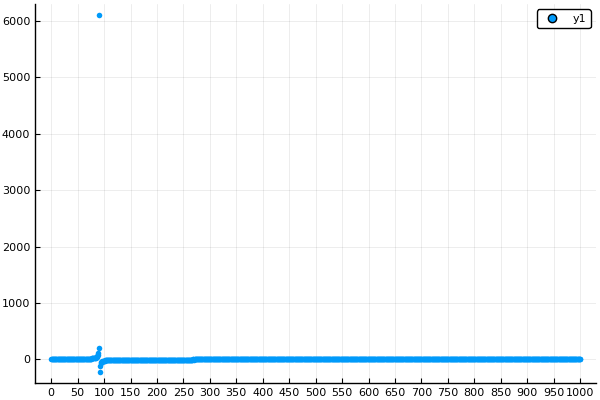

In [16]:
xs = collect(0:1000)
ys = desp_medio

scatter(xs, ys,
xticks=:0:50:1000,
markerstrokewidth = 0)

In [25]:
N = 1000
Ls = []
#coefs_dif2 = []
DMS = []

for k = 2 #2:length(lista_aerolineas)
       #@show k
    
    airline_code = lista_aerolineas[k] 
    #@show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    index_wuh = string(airline_code, "_WUH_index.csv") 
    indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    #@show indice_wuh
    
    
    for i =92 #tiempo
        @show i
        Ls = []
        col = rwn[:,i]
            @show col
            
        for j in 1:1000 #num. de iteraciones/renglones
                #@show j
                
                indice_aerop = col[j]
                #@show indice_aerop
            if indice_aerop != 0
                spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
                #@show spls.dists
                dist_media = spls.dists[indice_wuh[]]
                #@show dist_media
                L = (dist_media)^2
                
            elseif indice_aerop == 0
                L = 0
                N -= 1
            end
            
            push!(Ls, L) #para un mismo tiempo
            @show Ls
        end
        #@show Ls
        #@show N
        dms2 = (sum(Ls))/N
        push!(DMS, dms2)
        #@show DMS2
        
        #D2 = dms2/(2*i)
        #push!(coefs_dif2, D2)
        #@show D2
    end
    
end
#coefs_dif2 = convert(Array{Float64, 1}, coefs_dif2)
DMS = convert(Array{Float64, 1}, DMS)
return DMS #, coefs_dif2

i = 92
col = [788, 0, 58, 2067, 985, 0, 1255, 135, 1390, 322, 1279, 239, 267, 211, 887, 2082, 88, 2462, 1085, 1234, 444, 374, 1706, 2608, 282, 2932, 260, 374, 1667, 1797, 970, 580, 390, 140, 1027, 9, 223, 4, 995, 365, 577, 238, 271, 422, 387, 2769, 276, 449, 604, 424, 421, 1544, 384, 1653, 324, 91, 375, 140, 186, 1946, 1165, 1653, 1936, 102, 423, 139, 143, 823, 1032, 1349, 180, 2410, 590, 716, 2009, 273, 173, 6, 528, 45, 705, 590, 1059, 1427, 887, 195, 1984, 1041, 390, 852, 223, 396, 289, 892, 1651, 736, 1871, 22, 577, 1463, 287, 287, 1492, 9, 381, 2919, 616, 1824, 298, 1027, 251, 187, 184, 464, 451, 1487, 918, 399, 387, 203, 395, 1610, 273, 528, 291, 1413, 157, 995, 128, 393, 2735, 179, 105, 1667, 369, 2208, 273, 437, 282, 1162, 0, 219, 188, 457, 1645, 1543, 600, 1611, 4, 104, 1026, 1587, 0, 340, 1005, 316, 423, 181, 4, 232, 1886, 1047, 823, 1052, 1073, 219, 399, 1486, 418, 847, 1949, 0, 238, 888, 1946, 1027, 14, 1068, 435, 1311, 918, 2878, 2172, 104, 279, 1223, 150, 366, 149, 1937, 1

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 1

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4,

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1,

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0]
Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4]
Ls = Any[9, 0, 4, 36, 9, 0

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 4

Excessive output truncated after 524564 bytes.


Ls = Any[9, 0, 4, 36, 9, 0, 4, 4, 9, 9, 4, 1, 1, 4, 9, 49, 9, 16, 4, 9, 9, 4, 4, 36, 0, 16, 4, 4, 1, 9, 4, 9, 4, 1, 4, 4, 4, 4, 9, 4, 4, 1, 1, 4, 1, 16, 1, 4, 4, 4, 4, 9, 4, 4, 9, 9, 4, 1, 9, 9, 9, 4, 9, 9, 4, 1, 4, 9, 9, 9, 9, 4, 4, 9, 4, 1, 9, 4, 4, 9, 1, 4, 4, 4, 9, 9, 16, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 1, 1, 9, 4, 4, 16, 9, 16, 4, 4, 1, 4, 4, 9, 4, 4, 4, 4, 1, 9, 4, 4, 1, 4, 4, 4, 9, 9, 9, 9, 9, 4, 9, 1, 9, 4, 1, 4, 0, 16, 0, 1, 4, 9, 4, 9, 4, 16, 4, 4, 9, 4, 0, 4, 9, 4, 4, 4, 4, 1, 9, 4, 9, 9, 9, 1, 4, 4, 4, 25, 9, 0, 1, 4, 9, 4, 4, 9, 9, 4, 4, 25, 4, 4, 1, 4, 1, 4, 4, 9, 4, 9, 4, 0, 9, 9, 9, 4, 9, 4, 4, 9, 4, 4, 4, 9, 0, 4, 16, 9, 9, 9, 4, 4, 1, 4, 16, 4, 4, 4, 1, 16, 9, 9, 4, 4, 4, 4, 9, 0, 1, 9, 1, 1, 1, 9, 0, 9, 9, 0, 4, 4, 4, 4, 9, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 4, 1, 4, 9, 9, 16, 4, 4, 16, 4, 1, 9, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 9, 9, 9, 4, 9, 4, 4, 9, 9, 4, 9, 4, 1, 4, 9, 1, 9, 4, 9, 9, 4, 4, 4, 4, 4, 0, 4, 9, 16, 4, 9, 16, 9, 1, 4, 1, 4, 4, 4, 4, 16, 9, 1, 4, 4, 9, 

1-element Array{Float64,1}:
 6.284979423868313

In [26]:
N = 1000
Ls = []
#coefs_dif2 = []
DMS = []

for k = 2 #2:length(lista_aerolineas)
       #@show k
    
    airline_code = lista_aerolineas[k] 
    #@show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    index_wuh = string(airline_code, "_WUH_index.csv") 
    indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    #@show indice_wuh
    
    
    for i =9 #tiempo
        @show i
        Ls = []
        col = rwn[:,i]
            @show col
            
        for j in 1:1000 #num. de iteraciones/renglones
                #@show j
                
                indice_aerop = col[j]
                #@show indice_aerop
            if indice_aerop != 0
                spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
                #@show spls.dists
                dist_media = spls.dists[indice_wuh[]]
                #@show dist_media
                L = (dist_media)^2
                
            elseif indice_aerop == 0
                L = 0
                N -= 1
            end
            
            push!(Ls, L) #para un mismo tiempo
            @show Ls
        end
        #@show Ls
        #@show N
        dms2 = (sum(Ls))/N
        push!(DMS, dms2)
        #@show DMS2
        
        #D2 = dms2/(2*i)
        #push!(coefs_dif2, D2)
        #@show D2
    end
    
end
#coefs_dif2 = convert(Array{Float64, 1}, coefs_dif2)
DMS = convert(Array{Float64, 1}, DMS)
return DMS #, coefs_dif2

i = 9
col = [1484, 1595, 14, 2408, 1314, 136, 2008, 287, 1421, 143, 273, 565, 222, 364, 1706, 265, 232, 371, 238, 137, 497, 277, 272, 2593, 263, 138, 264, 182, 2676, 763, 221, 6, 272, 236, 140, 276, 296, 1961, 139, 249, 4, 222, 222, 271, 273, 139, 274, 1584, 1897, 2402, 366, 147, 2413, 1680, 143, 1605, 401, 14, 1609, 1804, 2034, 219, 2027, 238, 238, 1211, 272, 514, 1695, 271, 180, 800, 15, 149, 265, 512, 272, 140, 770, 1483, 239, 1574, 264, 230, 1578, 249, 265, 2316, 452, 252, 223, 767, 138, 237, 223, 235, 264, 264, 1471, 558, 279, 219, 498, 1394, 1900, 258, 140, 268, 238, 511, 55, 516, 223, 247, 2309, 267, 528, 1050, 767, 449, 1653, 299, 1747, 176, 2311, 136, 53, 228, 138, 276, 1021, 262, 1609, 1521, 74, 387, 3015, 4, 261, 223, 282, 293, 74, 1789, 385, 764, 224, 2639, 1552, 292, 1574, 260, 768, 500, 437, 500, 267, 224, 393, 767, 222, 1079, 292, 148, 223, 272, 1673, 1218, 1997, 375, 379, 272, 736, 286, 247, 2295, 766, 449, 250, 2316, 139, 1421, 272, 1413, 1025, 250, 1579, 224, 1331, 27

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4]

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4]
Ls = Any[4, 1, 4, 4, 1, 1, 4, 1,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

Excessive output truncated after 524295 bytes.

Ls = Any[4, 1, 4, 4, 1, 1, 4, 1, 9, 4, 1, 4, 1, 9, 4, 1, 1, 4, 1, 4, 4, 4, 1, 25, 4, 1, 1, 4, 9, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 9, 4, 4, 4, 4, 4, 1, 9, 4, 4, 9, 9, 1, 4, 1, 1, 9, 1, 4, 4, 1, 9, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 9, 4, 1, 4, 1, 9, 4, 1, 4, 1, 9, 1, 4, 9, 1, 4, 4, 4, 9, 9, 9, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 1, 9, 4, 1, 4, 0, 4, 4, 9, 4, 4, 1, 9, 9, 1, 4, 4, 4, 4, 4, 4, 1, 1, 9, 1, 1, 9, 1, 4, 4, 1, 4, 4, 9, 4, 4, 1, 4, 1, 1, 16, 4, 4, 1, 4, 1, 9, 1, 4, 9, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 0, 4, 9, 1, 1, 4, 1, 4, 9, 9, 9, 1, 4, 4, 1, 4, 9, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 4, 1, 1, 4, 1, 4, 1, 4, 4, 9, 4, 1, 9, 1, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 9, 4, 1, 1, 4, 1, 9, 1, 1, 4, 1, 1, 4, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 9, 1, 4, 1, 4, 1, 1, 9, 1, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 9, 1, 1, 4, 4, 1, 1, 4,

1-element Array{Float64,1}:
 3.3753753753753752

In [27]:
N = 1000
Ls = []
#coefs_dif2 = []
DMS = []

for k = 2 #2:length(lista_aerolineas)
       #@show k
    
    airline_code = lista_aerolineas[k] 
    #@show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    index_wuh = string(airline_code, "_WUH_index.csv") 
    indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    #@show indice_wuh
    
    
    for i =1000 #tiempo
        @show i
        Ls = []
        col = rwn[:,i]
            @show col
            
        for j in 1:1000 #num. de iteraciones/renglones
                #@show j
                
                indice_aerop = col[j]
                #@show indice_aerop
            if indice_aerop != 0
                spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
                #@show spls.dists
                dist_media = spls.dists[indice_wuh[]]
                #@show dist_media
                L = (dist_media)^2
                
            elseif indice_aerop == 0
                L = 0
                N -= 1
            end
            
            push!(Ls, L) #para un mismo tiempo
            @show Ls
        end
        #@show Ls
        #@show N
        dms2 = (sum(Ls))/N
        push!(DMS, dms2)
        #@show DMS2
        
        #D2 = dms2/(2*i)
        #push!(coefs_dif2, D2)
        #@show D2
    end
    
end
#coefs_dif2 = convert(Array{Float64, 1}, coefs_dif2)
DMS = convert(Array{Float64, 1}, DMS)
return DMS #, coefs_dif2

i = 1000
col = [136, 0, 1797, 6, 0, 0, 0, 404, 1043, 0, 0, 0, 349, 408, 399, 1018, 405, 276, 0, 0, 270, 0, 2589, 2589, 387, 2656, 238, 138, 357, 1486, 0, 717, 0, 3001, 1109, 2592, 278, 774, 577, 0, 979, 254, 192, 559, 0, 0, 0, 1240, 0, 1091, 0, 0, 506, 0, 444, 0, 1028, 1493, 0, 0, 1914, 0, 2697, 1073, 0, 0, 0, 0, 0, 0, 0, 0, 2589, 0, 2800, 1006, 0, 0, 1105, 1859, 0, 775, 297, 451, 0, 0, 31, 379, 0, 223, 1972, 139, 136, 443, 0, 0, 1025, 0, 342, 89, 559, 987, 1475, 0, 769, 1025, 0, 442, 0, 4, 590, 0, 1914, 368, 2302, 0, 1918, 0, 2527, 1793, 0, 126, 52, 193, 900, 0, 422, 0, 921, 0, 418, 2529, 0, 74, 0, 0, 421, 0, 0, 191, 0, 432, 264, 1157, 0, 0, 251, 0, 293, 287, 1776, 0, 0, 182, 71, 598, 334, 0, 407, 0, 600, 0, 0, 0, 0, 492, 0, 0, 1109, 916, 357, 0, 2532, 800, 0, 609, 4, 0, 0, 297, 0, 900, 821, 0, 292, 0, 0, 327, 1266, 178, 2592, 1258, 0, 0, 259, 267, 0, 1914, 516, 0, 1476, 602, 414, 335, 2212, 0, 0, 345, 0, 104, 1998, 1050, 1527, 1991, 1240, 918, 0, 2389, 950, 182, 792, 736, 224, 0, 747

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9]
Ls = Any[1, 0, 9, 4,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0]
Ls = Any[1, 0

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9]
Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9]
Ls = Any[1, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

Excessive output truncated after 525914 bytes.

Ls = Any[1, 0, 9, 4, 0, 0, 0, 4, 9, 0, 0, 0, 9, 4, 4, 9, 4, 1, 0, 0, 4, 0, 25, 25, 1, 9, 1, 1, 4, 4, 0, 9, 0, 64, 4, 36, 1, 4, 4, 0, 9, 4, 4, 4, 0, 0, 0, 4, 0, 9, 0, 0, 4, 0, 9, 0, 9, 4, 0, 0, 9, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 9, 9, 0, 0, 4, 9, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 9, 1, 1, 4, 0, 0, 9, 0, 4, 4, 4, 9, 4, 0, 4, 9, 0, 4, 0, 4, 4, 0, 9, 4, 4, 0, 9, 0, 9, 9, 0, 4, 4, 4, 4, 0, 4, 0, 9, 0, 4, 9, 0, 4, 0, 0, 4, 0, 0, 9, 0, 9, 1, 16, 0, 0, 1, 0, 4, 1, 9, 0, 0, 4, 9, 9, 9, 0, 4, 0, 4, 0, 0, 0, 0, 16, 0, 0, 4, 4, 4, 0, 9, 4, 0, 25, 4, 0, 0, 4, 0, 4, 9, 0, 1, 0, 0, 9, 4, 4, 36, 9, 0, 0, 1, 1, 0, 9, 1, 0, 4, 4, 4, 9, 9, 0, 0, 9, 0, 4, 9, 9, 4, 9, 4, 4, 0, 9, 16, 4, 9, 4, 1, 0, 9, 4, 4, 0, 0, 0, 9, 9, 1, 9, 4, 0, 0, 25, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 9, 9, 9, 49, 4, 4, 9, 0, 9, 4, 9, 4, 9, 4, 4, 4, 9, 4, 4, 0, 9, 0, 0, 0, 0, 9, 4, 4, 4, 36, 9, 4, 4, 4, 0, 9, 1, 4, 0, 0, 0, 0, 4, 4, 9, 9, 4, 0, 0, 4, 25, 4, 4, 0, 4, 16, 9, 9, 25, 1, 4, 0, 9, 4, 0, 1, 4, 25, 0, 9, 0, 4, 9, 4, 0, 9,

1-element Array{Float64,1}:
 7.506787330316742

In [37]:
N = 0

0

In [45]:
function difusion_coeff2(num_airline_code::Int64)

NN = 0
Ls = []
#coefs_dif2 = []
DMS = []

for k = num_airline_code #2:length(lista_aerolineas)
       #@show k
    
    airline_code = lista_aerolineas[k] 
    #@show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    #index_wuh = string(airline_code, "_WUH_index.csv") 
    #indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    #@show indice_wuh
    
    
    for i =1:1001 #tiempo
        
        NN = 0
        Ls = []
        col = rwn[:,i]
            #@show col
            
        for j in 1:1000 #num. de iteraciones/renglones
                #@show j
                
                indice_aerop = col[j]
               
            if indice_aerop != 0
                    
                spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
                dist_media = spls.dists[282]
          
                L = (dist_media)^2
                NN += 1
                #@show NN
            elseif indice_aerop == 0
                L = 0
                 #   @show NN
                #N = N - 1
            end
            
            push!(Ls, L) #para un mismo tiempo
            #@show Ls
            L = 0
            dist_media = 0
        end
        
        dms2 = (sum(Ls))/NN
        push!(DMS, dms2)
        
        
        #D2 = dms2/(2*i)
        #push!(coefs_dif2, D2)
        #@show D2
    end
    
end
#coefs_dif2 = convert(Array{Float64, 1}, coefs_dif2)
DMS = convert(Array{Float64, 1}, DMS)
return DMS #, coefs_dif2
end

difusion_coeff2 (generic function with 1 method)

In [46]:
difusion_coeff2(2)

1001-element Array{Float64,1}:
 0.0               
 1.0               
 2.024             
 2.415             
 2.649             
 2.872             
 3.036             
 3.376             
 3.3753753753753752
 3.67967967967968  
 3.765765765765766 
 4.019019019019019 
 4.08008008008008  
 ⋮                 
 7.444277108433735 
 7.326807228915663 
 7.406626506024097 
 7.233433734939759 
 7.313253012048193 
 7.52790346907994  
 7.478129713423831 
 7.441930618401207 
 7.44947209653092  
 7.467571644042232 
 7.506787330316742 
 7.7631975867269984

In [47]:
desp_medio = ans

1001-element Array{Float64,1}:
 0.0               
 1.0               
 2.024             
 2.415             
 2.649             
 2.872             
 3.036             
 3.376             
 3.3753753753753752
 3.67967967967968  
 3.765765765765766 
 4.019019019019019 
 4.08008008008008  
 ⋮                 
 7.444277108433735 
 7.326807228915663 
 7.406626506024097 
 7.233433734939759 
 7.313253012048193 
 7.52790346907994  
 7.478129713423831 
 7.441930618401207 
 7.44947209653092  
 7.467571644042232 
 7.506787330316742 
 7.7631975867269984

In [55]:
using LaTeXStrings

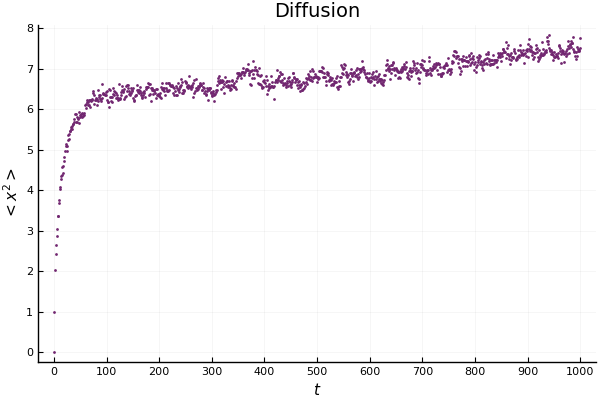

In [68]:

xs = collect(0:1000)
ys = desp_medio

scatter(xs, ys,
    xticks =:0:100:1000,
    yticks =:0:1:8,
    title = "Diffusion",
    xlabel = L"t",
    ylabel = L"<x^2>",
    legend = false,
    markercolor = "#712670",
    markerstrokewidth = 0,
    markersize = 2,
    gridalpha = 0.05)